<a href="https://colab.research.google.com/github/amanoese/study_keras_for_colaboratory/blob/master/study_keras_for_movie_score_label_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Tue Apr 16 01:37:05 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    18W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - v

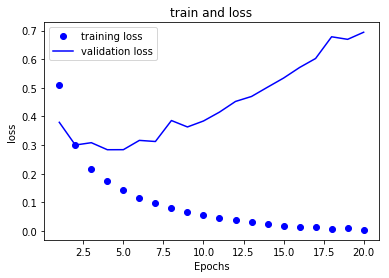

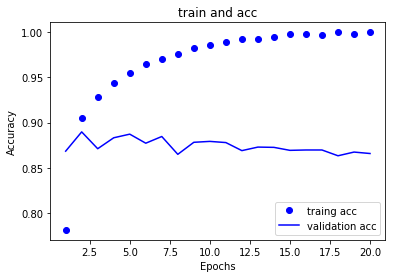

In [24]:
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

# index 0 is defined padding
# index 1 is defined sequence start code
# index 2 is defined unknown word
decoded_review = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

def vectorize_sequences(sequences, demensions=10000):
  results = np.zeros((len(sequences),demensions))
  
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
          
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
          
history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoches = range(1,len(loss_values) + 1)

plt.plot(epoches,loss_values, 'bo',label='training loss')
plt.plot(epoches,val_loss_values, 'b',label='validation loss')

plt.title('train and loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epoches,acc, 'bo',label='traing acc')
plt.plot(epoches,val_acc, 'b',label='validation acc')

plt.title('train and acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
import numpy as np
array = np.array([[1,2,3,4,5],["a","b","c","d","e"]])

array[0,[1,3]] = 9
array

array([['1', '9', '3', '9', '5'],
       ['a', 'b', 'c', 'd', 'e']], dtype='<U21')

In [23]:
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

# index 0 is defined padding
# index 1 is defined sequence start code
# index 2 is defined unknown word
decoded_review = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

def vectorize_sequences(sequences, demensions=10000):
  results = np.zeros((len(sequences),demensions))
  
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
          
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512)
          
results = model.evaluate(x_test,y_test)
results

model.predict(x_test)

Epoch 1/4
15000/15000 [==============================] - 2s 106us/step - loss: 0.5084 - acc: 0.7813
Epoch 2/4
15000/15000 [==============================] - 1s 63us/step - loss: 0.3004 - acc: 0.9047
Epoch 3/4
15000/15000 [==============================] - 1s 63us/step - loss: 0.2179 - acc: 0.9285
Epoch 4/4
25000/25000 [==============================] - 2s 92us/step


array([[0.23409912],
       [0.9974173 ],
       [0.7748976 ],
       ...,
       [0.09021088],
       [0.10277787],
       [0.34924704]], dtype=float32)